In [32]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '..')
from analysis.analysis_utils import *
from analysis.plot_utils import *
import numpy as np
import pandas as pd



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
debate_run_id = 'zye2tmr'
df = prepare_df(['debates'])
df = df[df['run_id_debates'] == debate_run_id]
df.shape

(38, 36)

In [61]:
correct_debater_response_times = []
incorrect_debater_response_times = []
from collections import defaultdict
correct_by_turn_dict = defaultdict(list)
incorrect_by_turn_dict = defaultdict(list)
for idx, row in df.iterrows():
    correct_idx = row['correct_idx_debates']
    num_correct_turns = 0
    num_incorrect_turns = 0
    for turn in row['debate_history_debates']:
        if turn['debater_idx'] == correct_idx:
            correct_debater_response_times.append(turn['response_time'])
            correct_by_turn_dict[num_correct_turns].append(turn['response_time'])
            num_correct_turns += 1
        elif turn['debater_idx'] != correct_idx:
            incorrect_debater_response_times.append(turn['response_time'])
            incorrect_by_turn_dict[num_incorrect_turns].append(turn['response_time'])
            num_incorrect_turns += 1
correct_debater_response_times = pd.Series(correct_debater_response_times)
incorrect_debater_response_times = pd.Series(incorrect_debater_response_times)

In [62]:
incorrect_debater_response_times.shape

(190,)

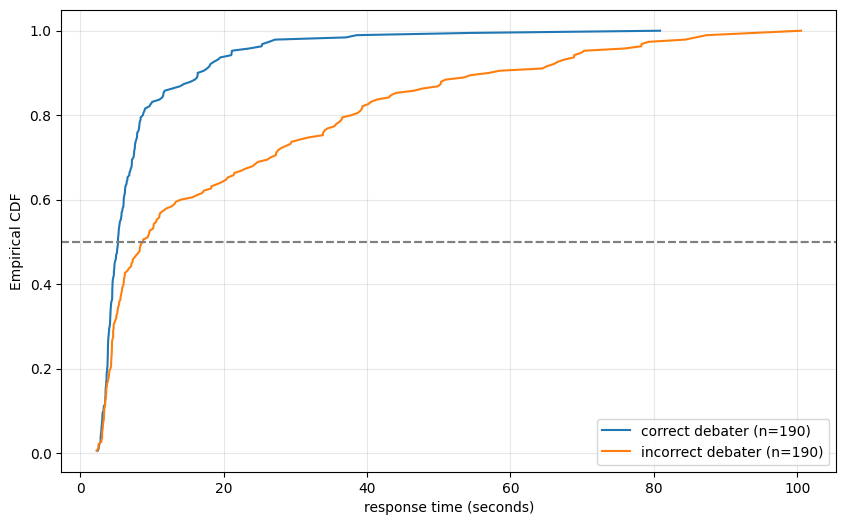

In [63]:
ax = cdf((correct_debater_response_times, incorrect_debater_response_times), labels=['correct debater', 'incorrect debater'])
ax.legend()
plt.xlabel('response time (seconds)')
plt.show()

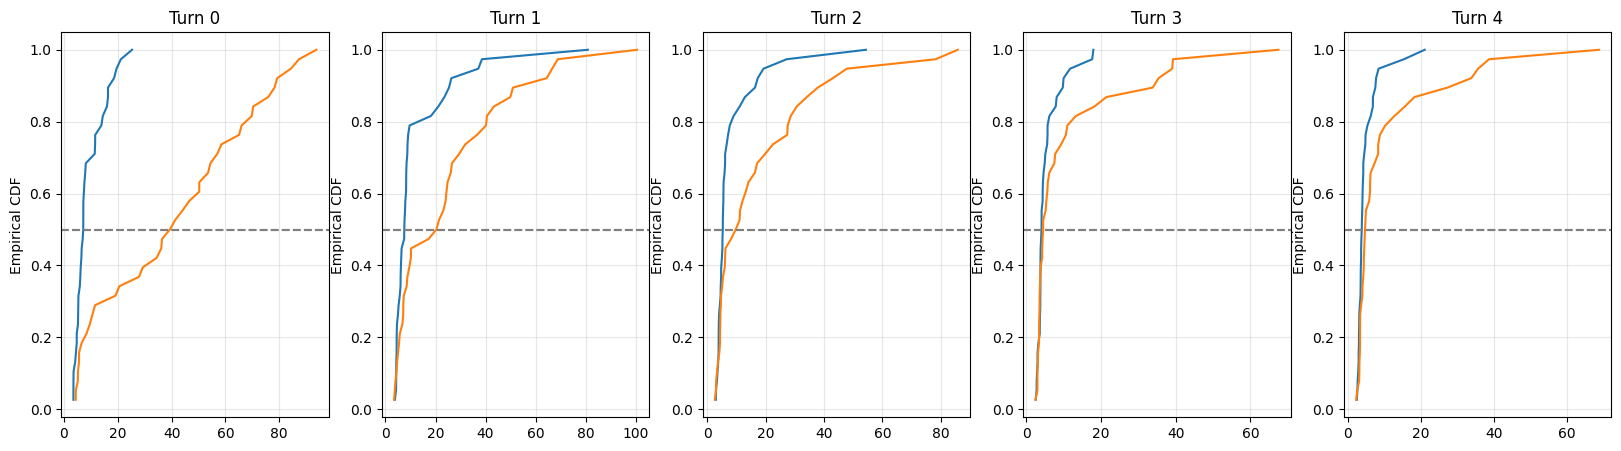

In [75]:
fig, ax = plt.subplots(1, 5, figsize=(20, 5))

num_turns_per_debater = max(correct_by_turn_dict)
for i in range(num_turns_per_debater + 1):
    cdf((pd.Series(correct_by_turn_dict[i]), pd.Series(incorrect_by_turn_dict[i])), labels=['correct debater', 'incorrect debater'], ax=ax[i])
    ax[i].set_title(f'Turn {i}')
    

In [70]:
max(correct_by_turn_dict)

4